### OpenCV DNN 패키지를 이용하여 MASK R-CNN 기반의 Object Detection/Instance Segmentation 수행
* Tensorflow 에서 Pretrained 된 모델 파일을 OpenCV에서 로드하여 이미지와 영상에 대한 Object Detection 수행할 것이다

#### 입력 이미지로 사용될 이미지 다운로드/보기

In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2022-09-02 14:36:14--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-09-02 14:36:14 (13.9 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



image shape: (633, 806, 3)


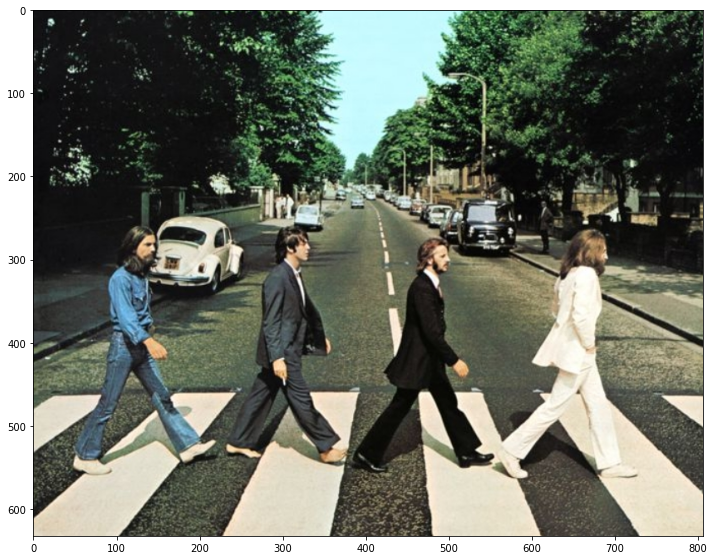

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### Tensorflow에서 Pretrained 된 Inference모델(Frozen graph)와 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 에 다운로드 URL 있음.
* pretrained 모델은 http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz 에서 다운로드 후 압축 해제
* pretrained 모델을 위한 환경 파일은 https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt 에서 다운로드 
* download된 모델 파일과 config 파일을 인자로 하여 inference 모델을 DNN에서 로딩함. 


In [3]:
# pretrained model을 다운로드 받을 디렉토리 생성
!mkdir ./pretrained
# model 다운로드
!wget -O ./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
# config 다운로드
!wget -O ./pretrained/config_mask_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt

--2022-09-02 14:36:49--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.197.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

./pretrained/mask_r 100%[===================>] 169.58M   124MB/s    in 1.4s    

2022-09-02 14:36:50 (124 MB/s) - ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]

--2022-09-02 14:36:50--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

In [4]:
# frozen graph를 얻기 위하여 압축 해제
!tar -xvf ./pretrained/mask*.tar.gz -C ./pretrained 

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [5]:
# 디렉토리 출력
!pwd
# checkpoint file정보 출력
!ls -lia ./pretrained/mask_rcnn_inception_v2_coco_2018_01_28

/content
total 132684
6296493 drwxr-xr-x 3 345018 5000     4096 Feb  1  2018 .
6296470 drwxr-xr-x 3 root   root     4096 Sep  2 14:37 ..
6296495 -rw-r--r-- 1 345018 5000       77 Feb  1  2018 checkpoint
6296502 -rw-r--r-- 1 345018 5000 67138064 Feb  1  2018 frozen_inference_graph.pb
6296497 -rw-r--r-- 1 345018 5000 63616508 Feb  1  2018 model.ckpt.data-00000-of-00001
6296494 -rw-r--r-- 1 345018 5000    16123 Feb  1  2018 model.ckpt.index
6296498 -rw-r--r-- 1 345018 5000  5069133 Feb  1  2018 model.ckpt.meta
6296496 -rw-r--r-- 1 345018 5000     3776 Feb  1  2018 pipeline.config
6296499 drwxr-xr-x 3 345018 5000     4096 Feb  1  2018 saved_model


#### dnn에서 readNetFromTensorflow()로 tensorflow inference 모델을 로딩 후 Inference 수행
* cv_net.forward() 수행 시 Bounding box Inference(bbox regression, bbox classification)과 mask inference 결과를 함께 출력하기 위해 layer명 detection_out_final, detection_masks 결과 가져옴

In [7]:
# readNetFromTensorflow메소드에 frozen graph와 config를 전달하여 모델을 생성한다
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_mask_graph.pbtxt')

# 전에 cv.imread로 읽어들인 BGM이미지를 openCV의 모델이 처리할 수 있도록 blob로 만들어준다
blob = cv2.dnn.blobFromImage(img , swapRB=True, crop=False)

# 이 blob를 모델의 입력값으로 설정
cv_net.setInput(blob)

# Bounding box 정보(BBox 좌표값 + classification)는 detection_out_final layer에서, mask 정보는 detection_masks layer에서 다음과 같이 추출한다 
boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])

In [8]:
# 한 번 모든 layer의 이름을 출력 해보자
layer_names = cv_net.getLayerNames()
layer_names

('Preprocessor/mul',
 'Preprocessor/sub',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d/depthwise',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/MaxPool_2a_3x3/MaxPool',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu',
 'FirstStageFeatureExtractor/InceptionV2/I

#### coco 데이터 세트의 클래스id별 클래스명 지정. 

In [10]:
# coco dataset의 클래스 ID별 클래스명 매핑
labels_to_names_seq= {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}



#masking 시 클래스별로 적용할 컬러를 입력한다
# 다음 중 random하게 선택하여 시각화를 진행한다
colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250],
     [50, 190, 190]] )

In [11]:
# bbox 정보는  찾아낸 object 갯수별로(여기서는 100개), class_id, class confidence score,  bbox 좌표등 7개의 정보로 구성. 개
# masking 정보는 object 갯수별로 90개의 coco class 별로 15x15의 masking 으로 구성.

# boxes.shape : (1,1,100,7) = (이미지 배치 개수, 출력 layer의 개수 {YOLO같은 경우는 3개 였다} detected object개수, bbox정보 7개)
# masks.shape : (100,90,15,15) = (detected object개수, COCO Dataset class개수, )
print('boxes shape:', boxes.shape, 'masks shape:', masks.shape)

boxes shape: (1, 1, 100, 7) masks shape: (100, 90, 15, 15)


#### Detect된 Object에 대해서 bounding box와 mask를 시각화 
* 이미지 시각화 할 때 mask 공부를 위해서 Detected된 모든 object를 시각화 하지 않고 단 하나의 object만 시각화 수행해보자(iteration을 한번만 수행)

In [12]:
masks[0,0]
# 하나의 mask정보가 원본 이미지 size가 아니라 15*15이다.
# 이 반환된masks에는 0부터 1사이의 실수값들이 들어있다
# 나중에 이것에 mask_threshold를 적용하여 이 값 이상의 것들은 1로, 이하의 것들은 0으로 변환하는 작업을 거친다

array([[5.05761345e-05, 1.51209406e-05, 1.30301341e-05, 3.26758636e-05,
        1.25407096e-04, 1.59949542e-03, 1.72131639e-02, 9.73478034e-02,
        1.82075307e-01, 1.63195759e-01, 8.77476260e-02, 2.59182230e-02,
        3.98620404e-03, 5.24556846e-04, 4.42847231e-04],
       [7.68217706e-06, 3.63517438e-06, 5.46004685e-06, 4.70150226e-05,
        7.34756642e-04, 3.25893462e-02, 5.68581700e-01, 9.57904816e-01,
        9.86125648e-01, 9.72700715e-01, 8.33621740e-01, 3.00407857e-01,
        1.79045964e-02, 7.47650221e-04, 2.44054041e-04],
       [6.13494694e-06, 3.92934862e-06, 1.21724497e-05, 2.97153631e-04,
        6.27446454e-03, 1.55848145e-01, 8.96824658e-01, 9.92803276e-01,
        9.95611727e-01, 9.74057913e-01, 6.47798061e-01, 1.12822779e-01,
        6.54229242e-03, 1.94253167e-04, 5.53994687e-05],
       [1.16875181e-05, 9.90803346e-06, 5.14330895e-05, 2.26761447e-03,
        7.80595988e-02, 7.39753485e-01, 9.90540504e-01, 9.98218358e-01,
        9.96732950e-01, 9.16381538e-0

In [13]:
boxes.shape, masks.shape

((1, 1, 100, 7), (100, 90, 15, 15))

In [14]:
# 다시 한 번 확인 해보자
# boxes.shape, masks.shape
# ((1, 1, 100, 7), (100, 90, 15, 15))
# masks.shape에서 (100,90,15,15) = (Detected Object개수, )
# Detected Object별로 COCO Class에 해당하는 15*15 Masking정보를 가지고 있는 것이다

import numpy as np

numClasses = masks.shape[1] # COCO Dataset의 class개수
numDetections = boxes.shape[2] # Detected Object의 개수

# opencv의 rectangle(), putText() API는 인자로 들어온 IMAGE array에 그대로 수정작업을 수행하므로 bounding box 적용을 위한 
# 별도의 image array 생성. 
draw_img = img_rgb.copy()

img_height = draw_img.shape[0]
img_width = draw_img.shape[1]

conf_threshold = 0.5 # 0.5이하의 confidence_score를 가진 Object들만 시각화 수행
mask_threshold = 0.3 # 위 cell참조

green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 이미지를 mask 설명을 위해서 iteration을 한번만 수행. 
#for i in range(numDetections):
for i in range(1):
    box = boxes[0, 0, i] # i번째 box 정보를 가져온다 (7개) = (이상한 값, classID, confidence_score, xmin,ymin,xmax,ymax)
    mask = masks[i] # (90,15,15) 형태 반환 : 하나의 Object에 대한 mask정보이다
    score = box[2] # 
    if score > conf_threshold:
        classId = int(box[1])
        left = int(img_width * box[3])
        top = int(img_height * box[4])
        right = int(img_width * box[5])
        bottom = int(img_height * box[6])

        text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
        cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, thickness=2 )
        cv2.putText(draw_img, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, red_color, 1)

        #### Detect된 Object에 대한 image mask 처리 수행을 위한 기본 정보 추출. 
        # 네트웍 모델에서 반환된 detect된 object의 mask 정보 추출
        # mask = (90,15,15)
        # mask[classId] = (15,15) : 해당 classid에 해당하는 Mask정보만을 뽑아오는 것이다
        classMask = mask[classId] # (15,15). DNN모듈은 이렇게 특이한 반환값이 나오는데, 이를 다시 Object크기만큼 늘려주어야 한다
        print('Detect된 classMask shape:', classMask.shape)

        # 원본 이미지의 object 크기에 맞춰 mask 크기를 scale out(늘린)한다
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))

        print('원본 오브젝트 비율로 scale out된 classMask shape:', scaled_classMask.shape)
        # 지정된 mask Threshold 값 이상인지 True, False boolean형태의 mask 정보 생성. 
        # mask들 중에서 threshold이상의 값들만 출력하는 것이다
        s_mask_b = (scaled_classMask > mask_threshold)

        print('scaled mask shape:', s_mask_b.shape, 'scaled mask pixel count:', s_mask_b.shape[0]*s_mask_b.shape[1],
              'scaled mask true shape:',s_mask_b[s_mask_b==True].shape, 
              'scaled mask False shape:', s_mask_b[s_mask_b==False].shape)
        
        # mask를 적용할 bounding box 영역의 image 추출
        # 즉 draw_img의 [top:bottom+1, left:right+1]영역에 mask를 적용할 것이다.
        before_mask_roi = draw_img[top:bottom+1, left:right+1]
        print('before_mask_roi:', before_mask_roi.shape)

Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (284, 140)
scaled mask shape: (284, 140) scaled mask pixel count: 39760 scaled mask true shape: (19429,) scaled mask False shape: (20331,)
before_mask_roi: (284, 140, 3)


In [15]:
# object의 영역의 mask정보를 출력해보기
s_mask_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

####  Detected된 object에 mask 적용 후 시각화

In [16]:
vis_mask = (s_mask_b * 255).astype("uint8")
print(vis_mask.shape, vis_mask[vis_mask >= 1], vis_mask[vis_mask >= 1].shape)
# Open CV로 원본 Object에 masking 작업 수행
# 해당 mask영역만 빼고는 모두 Black색으로 만들어주는 메소드이다
instance = cv2.bitwise_and(before_mask_roi, before_mask_roi, mask=vis_mask)

(284, 140) [255 255 255 ... 255 255 255] (19429,)


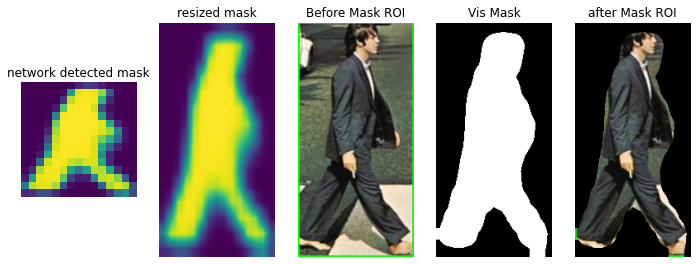

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(12, 8), ncols=5, nrows=1)

# Mask R-CNN에서 출력된 직후의 15*15 Mask
ax1.set_title('network detected mask')
ax1.axis('off')
ax1.imshow(classMask)

# Mask R-CNN에서 출력된 직후의 15*15 Mask를 Object 크기만큼 확대시켜준 것(이미지 크기가 아니라, Object크기 만큼 확대)
ax2.set_title('resized mask')
ax2.axis('off')
ax2.imshow(scaled_classMask)

# Masking하기 이전의 이미지의 Bbox부분
ax3.set_title('Before Mask ROI')
ax3.axis('off')
ax3.imshow(before_mask_roi)

# 확대한 Mask를 threshold값에 따라 0과 1로 바꾸어준 Mask
ax4.set_title('Vis Mask')
ax4.axis('off')
ax4.imshow(vis_mask, cmap='gray')

# 이미지의 bbox부분에서 mask값이 1이 아닌 이외의 곳은 black이 되도록 bitwise연산을 해준 것
ax5.set_title('after Mask ROI')
ax5.axis('off')
ax5.imshow(instance)

#### Detected된 object에 mask를 특정 투명 컬러로 적용후 시각화

In [20]:
draw_img[top:bottom+1, left:right+1].shape, draw_img[top:bottom+1, left:right+1][s_mask_b].shape
# Object의 BBox크기만큼의 영역에서, boolean indexing을 통해 s_mask_b=True인 영역만을 뽑아내는 것이다

((284, 140, 3), (19429, 3))

[255, 0, 255]


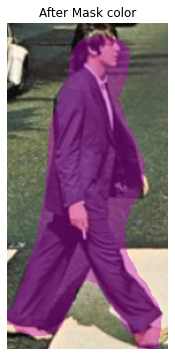

In [21]:
import numpy as np

draw_img = img_rgb.copy()

colorIndex = np.random.randint(0, len(colors)-1)
color = colors[colorIndex]
print(color)
after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]
draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

In [22]:
print('object image shape:', draw_img[top:bottom+1, left:right+1].shape)
print('boolena object mask:', s_mask_b, s_mask_b.shape)
print('object masking boolen index 결과 shape:', draw_img[top:bottom+1, left:right+1][s_mask_b].shape)

object image shape: (284, 140, 3)
boolena object mask: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] (284, 140)
object masking boolen index 결과 shape: (19429, 3)


In [23]:
print('투명 color 적용 1:', [0.3*color[0], 0.3*color[1], 0.3*color[2]])
print('투명 color 적용 2:', 0.6 * after_mask_roi)

투명 color 적용 1: [76.5, 0.0, 76.5]
투명 color 적용 2: [[57.  51.  43.8]
 [40.2 34.2 28.2]
 [30.6 24.6 18.6]
 ...
 [44.4 43.2 35.4]
 [49.2 49.2 42. ]
 [58.2 58.2 52.2]]


#### Mask 정보를 이용하여 Detect된 Object에 contour 윤곽선 적용. 

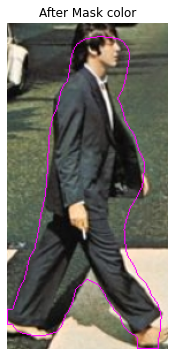

In [24]:
draw_img_01 = img_rgb.copy()

# s_mask_b : Mask정보가 Boolean값으로 들어 있는 array인데, 이것을 다음과 같이 int형으로 변경해야 findContour사용이 가능하다
s_mask_i = s_mask_b.astype(np.uint8)
contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(draw_img_01[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img_01[top:bottom+1, left:right+1])


#### Detected된 Object 모두에 Mask 하여 시각화 한다

Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (284, 140)
scaled mask shape: (284, 140) scaled mask pixel count: 39760 scaled mask true shape: (19429,) scaled mask False shape: (20331,)
before_mask_roi: (284, 140, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (320, 151)
scaled mask shape: (320, 151) scaled mask pixel count: 48320 scaled mask true shape: (19727,) scaled mask False shape: (28593,)
before_mask_roi: (320, 151, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (296, 178)
scaled mask shape: (296, 178) scaled mask pixel count: 52688 scaled mask true shape: (17478,) scaled mask False shape: (35210,)
before_mask_roi: (296, 178, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (293, 163)
scaled mask shape: (293, 163) scaled mask pixel count: 47759 scaled mask true shape: (17652,) scaled mask False shape: (30107,)
before_mask_roi: (293, 163, 3)
Detect된 classMask shape:

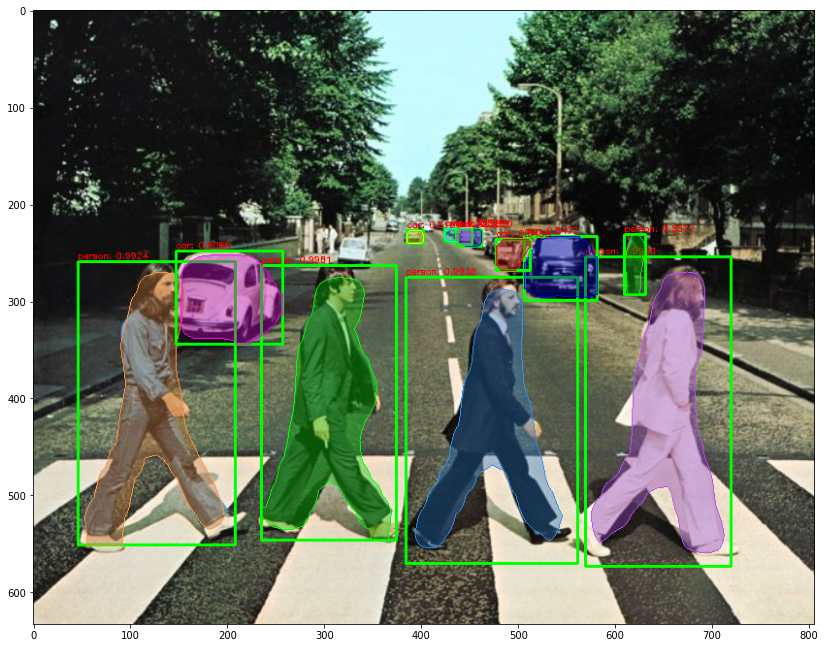

In [25]:
import numpy as np

numClasses = masks.shape[1]
numDetections = boxes.shape[2]

# opencv의 rectangle(), putText() API는 인자로 들어온 IMAGE array에 그대로 수정작업을 수행하므로 bounding box 적용을 위한 
# 별도의 image array 생성. 
draw_img = img.copy()

img_height = draw_img.shape[0]
img_width = draw_img.shape[1]
conf_threshold = 0.5
mask_threshold = 0.3

green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 아까는 한 개의 Object만 실시하였지만, 모든 Object에 대하여 실시한다
for i in range(numDetections):
    box = boxes[0, 0, i]
    mask = masks[i]
    score = box[2]
    if score > conf_threshold:
        classId = int(box[1])
        left = int(img_width * box[3])
        top = int(img_height * box[4])
        right = int(img_width * box[5])
        bottom = int(img_height * box[6])

        text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
        cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, thickness=2 )
        cv2.putText(draw_img, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, red_color, 1)

        #### Detect된 Object에 대한 image mask 처리 수행을 위한 기본 정보 추출. 
        # 네트웍 모델에서 반환된 detect된 object의 mask 정보 추출
        classMask = mask[classId]
        print('Detect된 classMask shape:', classMask.shape)
        # 원본 이미지의 object 크기에 맞춰 mask 크기 scale out 
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
        print('원본 오브젝트 비율로 scale out된 classMask shape:', scaled_classMask.shape)
        # 지정된 mask Threshold 값 이상인지 True, False boolean형태의 mask 정보 생성. 
        s_mask_b = (scaled_classMask > mask_threshold)
        print('scaled mask shape:', s_mask_b.shape, 'scaled mask pixel count:', s_mask_b.shape[0]*s_mask_b.shape[1],
              'scaled mask true shape:',s_mask_b[s_mask_b==True].shape, 
              'scaled mask False shape:', s_mask_b[s_mask_b==False].shape)

        # mask를 적용할 bounding box 영역의 image 추출
        before_mask_roi = draw_img[top:bottom+1, left:right+1]
        print('before_mask_roi:', before_mask_roi.shape)
        # Detect된 Object에 mask를 특정 투명 컬러로 적용. 
        colorIndex = np.random.randint(0, len(colors)-1)
        color = colors[colorIndex]
        after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]
        draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)
        # Detect된 Object에 윤곽선(contour) 적용. 
        s_mask_i = s_mask_b.astype(np.uint8)
        contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(draw_img[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(14, 14))
draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.imshow(draw_img)
plt.show()

#### 단일 image Segmentation 함수 생성. 

In [26]:
# bbox정보를 반환해주는 함수
def get_box_info(box, img_width, img_height):
    
    classId = int(box[1])
    left = int(img_width * box[3])
    top = int(img_height * box[4])
    right = int(img_width * box[5])
    bottom = int(img_height * box[6])
    
    left = max(0, min(left, img_width - 1))
    top = max(0, min(top, img_height - 1))
    right = max(0, min(right, img_width - 1))
    bottom = max(0, min(bottom, img_height - 1))
    
    return classId, left, top, right, bottom

# bbox를 그리는 함수
def draw_box(img_array, box, img_width, img_height, is_print=False):
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    score = box[2]
    classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
    text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
    
    if is_print:
        print("box:", box, "score:", score, "classId:", classId)
    
    cv2.rectangle(img_array, (left, top), (right, bottom), green_color, thickness=2 )
    cv2.putText(img_array, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, thickness=1)
    
    return img_array

# mask를 시각화 해주는 함수
def draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=False):
        
        classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
        classMask = mask[classId]
        # 원본 이미지의 object 크기에 맞춰 mask 크기 scale out 
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
        s_mask_b = (scaled_classMask > mask_threshold)
        before_mask_roi = img_array[top:bottom+1, left:right+1]
        
        # mask를 적용할 bounding box 영역의 image 추출하고 투명 color 적용. 
        colorIndex = np.random.randint(0, len(colors)-1)
        color = colors[colorIndex]
        after_mask_roi = img_array[top:bottom+1, left:right+1][s_mask_b]
        img_array[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)
        # Detect된 Object에 윤곽선(contour) 적용. 
        s_mask_i = s_mask_b.astype(np.uint8)
        contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img_array[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)
        
        return img_array

In [27]:
import time

# mask R-CNN사용하여 masked image를 반환하는 함수
def detect_image_mask_rcnn(cv_net, img_array, conf_threshold, mask_threshold, use_copied_array, is_print=False):
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
        #draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
    else:
        draw_img = img_array
        
    start_time = time.time()
    
    blob = cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False)
    cv_net.setInput(blob)
    boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])
    
    inference_time = time.time() - start_time
    if is_print:
        print('Segmentation Inference time {0:}'.format(inference_time))

    numClasses = masks.shape[1]
    numDetections = boxes.shape[2]

    img_height = img_array.shape[0]
    img_width = img_array.shape[1]
    
    for i in range(numDetections):
        box = boxes[0, 0, i]
        mask = masks[i]
        score = box[2]
        #print("score:", score)
        if score > conf_threshold:
            draw_box(img_array , box, img_width, img_height, is_print=is_print)
            draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=is_print)
    
    return img_array

In [28]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

image shape: (633, 806, 3)
Segmentation Inference time 5.18869948387146
box: [0.         0.         0.99608445 0.29211456 0.41625595 0.46419758
 0.86386395] score: 0.99608445 classId: 0
box: [0.         0.         0.99503857 0.70705724 0.4026657  0.89285994
 0.9064847 ] score: 0.99503857 classId: 0
box: [0.         0.         0.9937981  0.47765696 0.43570188 0.69640386
 0.9016292 ] score: 0.9937981 classId: 0
box: [0.         0.         0.9923969  0.05819517 0.41030934 0.25875422
 0.8719543 ] score: 0.9923969 classId: 0
box: [0.         2.         0.90857536 0.18292084 0.3929995  0.31934735
 0.5440713 ] score: 0.90857536 classId: 2
box: [0.         2.         0.84718394 0.62886804 0.36894062 0.7209961
 0.47316417] score: 0.84718394 classId: 2
box: [0.         2.         0.8455514  0.5919428  0.3733995  0.63604045
 0.42489886] score: 0.8455514 classId: 2
box: [0.         2.         0.5829998  0.5437925  0.35812187 0.574193
 0.3843462 ] score: 0.5829998 classId: 2
box: [0.         0.    

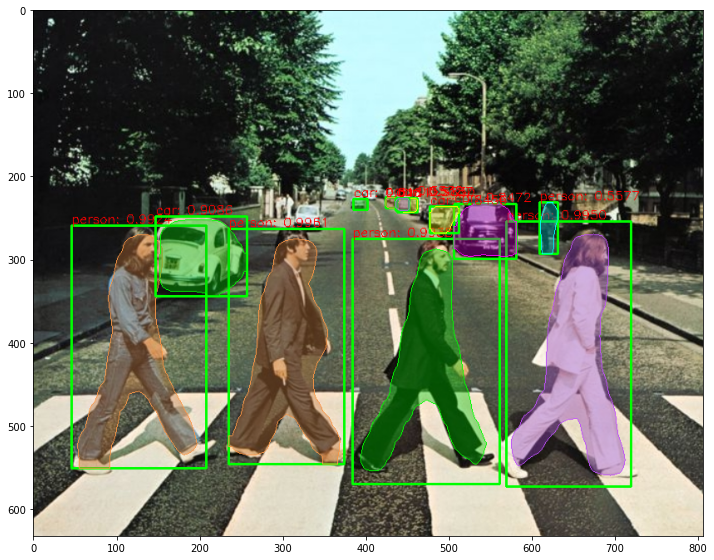

In [29]:
import os
# image 로드 
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_mask_graph.pbtxt')

img_detected = detect_image_mask_rcnn(cv_net, img, conf_threshold=0.5, mask_threshold=0.3, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### 다른 이미지 파일에 Segmentation 수행하기

In [30]:
# 다른 target image
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2022-09-02 15:27:04--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.01s   

2022-09-02 15:27:04 (7.11 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



image shape: (476, 735, 3)
Segmentation Inference time 5.010617971420288
box: [0.         0.         0.99785644 0.04259912 0.42621604 0.2566381
 0.93009865] score: 0.99785644 classId: 0
box: [0.         0.         0.9975453  0.43244976 0.2681948  0.67852885
 0.8399701 ] score: 0.9975453 classId: 0
box: [0.         0.         0.9971505  0.23768517 0.5497621  0.45513436
 0.94894993] score: 0.9971505 classId: 0
box: [ 0.         39.          0.9102633   0.44959113  0.63386905  0.5190123
  0.7239938 ] score: 0.9102633 classId: 39
box: [ 0.         38.          0.8011296   0.6458585   0.46479815  0.82042885
  0.5484391 ] score: 0.8011296 classId: 38
box: [ 0.         36.          0.31605223  0.8908464   0.46727496  0.9115547
  0.5001501 ] score: 0.31605223 classId: 36


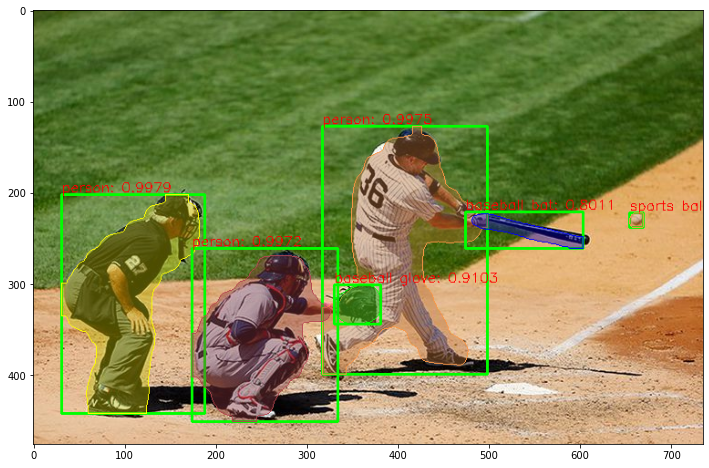

In [31]:
import os
# image 로드 
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_mask_graph.pbtxt')

# 야구공이 mask detect 되지 않아서 conf_threshold와 mask_threshold 를 낮춤. 
img_detected = detect_image_mask_rcnn(cv_net, img, conf_threshold=0.3, mask_threshold=0.2, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### 영상에 Segmentation 적용

In [32]:
# target video다운로드
!wget -O ./data/John_Wick_small.mp4 https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4

--2022-09-02 15:31:45--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1794863 (1.7M) [application/octet-stream]
Saving to: ‘./data/John_Wick_small.mp4’

./data/John_Wick_sm 100%[===================>]   1.71M  --.-KB/s    in 0.05s   

2022-09-02 15:31:45 (37.5 MB/s) - ‘./data/John_Wick_small.mp4’ saved [1794863/1794863]



In [33]:
# Object Detection때부터 계속 작성해왔던 video 처리 함수
def detect_video_mask_rcnn(cv_net, input_path, output_path, conf_threshold, mask_threshold,  is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, 24, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    frame_index=0
    while True:
        hasFrame, img_frame = cap.read()
        frame_index += 1
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        print("frame index:{0:}".format(frame_index), end=" ")
        returned_frame = detect_image_mask_rcnn(cv_net, img_frame, conf_threshold=conf_threshold,
                                                mask_threshold=mask_threshold,use_copied_array=False, is_print=is_print)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [34]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_mask_graph.pbtxt')

detect_video_mask_rcnn(cv_net,'/content/data/John_Wick_small.mp4', '/content/data/John_Wick_mask_01.avi',
                      conf_threshold=0.5, mask_threshold=0.3, is_print=True)

총 Frame 갯수: 58
frame index:1 Segmentation Inference time 4.441472291946411
box: [0.         2.         0.9897792  0.86242795 0.3607605  0.99989486
 0.8309683 ] score: 0.9897792 classId: 2
box: [0.         2.         0.97011715 0.         0.29770774 0.16895679
 0.7383984 ] score: 0.97011715 classId: 2
box: [0.         2.         0.95617515 0.12571141 0.3801415  0.4003645
 0.75959766] score: 0.95617515 classId: 2
box: [0.         2.         0.95180786 0.75568426 0.5090503  0.85527325
 0.7149634 ] score: 0.95180786 classId: 2
box: [0.         2.         0.76113313 0.7179851  0.53895617 0.78393286
 0.6857109 ] score: 0.76113313 classId: 2
box: [0.         0.         0.55496705 0.4124265  0.01324433 0.6135617
 0.69252044] score: 0.55496705 classId: 0
box: [0.         0.         0.5201008  0.65576553 0.41798288 0.72486687
 0.63431793] score: 0.5201008 classId: 0
frame index:2 Segmentation Inference time 4.309277772903442
box: [0.         2.         0.9903397  0.8629229  0.3609804  0.9998951
